## EDA ON IMDB MOVIE RATING PREDICTION

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('IMDb Movies India.csv',na_values=(' '),encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.shape

(15509, 10)

In [4]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

## Perform basic data quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15508 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.isna().sum()

Name           1
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

## Feature Engineering 
Steps performed under this section
1. Handling missing values

    Duration, Rating, Votes has many missing values, almost half of the rows of dataset are missing. It would be better to drop these rows as these might have big impact on prediction if we dont handle them
2. Convert Year,Duration,Votes to int

There are missing values and duplicated rows in the dataset.

In [7]:
df.dropna(inplace=True)
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# drop the duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df.shape

(5659, 10)

Lets convert Year,Duration,Votes columns from string to int

In [11]:
df['Year']= df['Year'].str.strip('()').astype(int)

In [12]:
df['Duration'] = df['Duration'].str.strip(' min').astype(int)

In [13]:
df['Votes'] = df['Votes'].str.replace(',','')
df['Votes'] = df['Votes'].str.replace('.','')
df['Votes'] = df['Votes'].str.strip('$')
df['Votes'] = df['Votes'].str.strip('M')
df['Votes'] = df['Votes'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 420.0+ KB


In [15]:
df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


## Data Preprocessing - Imputation

#### Separate categorical and continuous features

In [16]:
cat = list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [17]:
cat

['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

In [18]:
con

['Year', 'Duration', 'Rating', 'Votes']

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [20]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median'))])

In [21]:
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent'))])

In [22]:
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [23]:
df_pre = pre.fit_transform(df)
df_pre.head()

,num__Year,num__Duration,num__Rating,num__Votes,cat__Name,cat__Genre,cat__Director,cat__Actor 1,cat__Actor 2,cat__Actor 3
1,2019.0,109.0,7.0,8.0,#Gadhvi (He thought he was Gandhi),Drama,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019.0,110.0,4.4,35.0,#Yaaram,"Comedy, Romance",Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997.0,147.0,4.7,827.0,...Aur Pyaar Ho Gaya,"Comedy, Drama, Musical",Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005.0,142.0,7.4,1086.0,...Yahaan,"Drama, Romance, War",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012.0,82.0,5.6,326.0,?: A Question Mark,"Horror, Mystery, Thriller",Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


## Descriptive Analytics

#### Datatypes

In [24]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num__Year      5659 non-null   float64
 1   num__Duration  5659 non-null   float64
 2   num__Rating    5659 non-null   float64
 3   num__Votes     5659 non-null   float64
 4   cat__Name      5659 non-null   object 
 5   cat__Genre     5659 non-null   object 
 6   cat__Director  5659 non-null   object 
 7   cat__Actor 1   5659 non-null   object 
 8   cat__Actor 2   5659 non-null   object 
 9   cat__Actor 3   5659 non-null   object 
dtypes: float64(4), object(6)
memory usage: 486.3+ KB


Lets change the datatypes of Year,Duration,Rating back to int

In [25]:
df_pre['num__Year'] = df_pre['num__Year'].astype(int)
df_pre['num__Duration'] = df_pre['num__Duration'].astype(int)
df_pre['num__Rating'] = df_pre['num__Rating'].astype(int)
df_pre['num__Votes'] = df_pre['num__Votes'].astype(int)

In [26]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num__Year      5659 non-null   int32 
 1   num__Duration  5659 non-null   int32 
 2   num__Rating    5659 non-null   int32 
 3   num__Votes     5659 non-null   int32 
 4   cat__Name      5659 non-null   object
 5   cat__Genre     5659 non-null   object
 6   cat__Director  5659 non-null   object
 7   cat__Actor 1   5659 non-null   object
 8   cat__Actor 2   5659 non-null   object
 9   cat__Actor 3   5659 non-null   object
dtypes: int32(4), object(6)
memory usage: 397.9+ KB


#### Statistics

In [27]:
df_pre.describe().T

,count,mean,std,min,25%,50%,75%,max
num__Year,5659.0,1996.247570,19.741839,1931.0,1983.0,2002.0,2013.0,2021.0
num__Duration,5659.0,133.439124,25.319939,21.0,119.0,135.0,150.0,321.0
num__Rating,5659.0,5.452023,1.419934,1.0,5.0,6.0,6.0,10.0
num__Votes,5659.0,2697.649585,13651.503584,5.0,30.0,131.0,922.5,591417.0


In [28]:
cat1 = list(df_pre.columns[df_pre.dtypes=='object'])
con1 = list(df_pre.columns[df_pre.dtypes!='object'])

In [29]:
df_pre[cat1].describe().T

,count,unique,top,freq
cat__Name,5659,5385,Baazi,4
cat__Genre,5659,376,Drama,844
cat__Director,5659,2431,David Dhawan,41
cat__Actor 1,5659,1960,Amitabh Bachchan,104
cat__Actor 2,5659,2321,Rekha,52
cat__Actor 3,5659,2556,Pran,57


# Data Visualization

In [30]:
## Import matplotlib and seaborn libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Univariate Analysis
Hist plot for Continuous variables

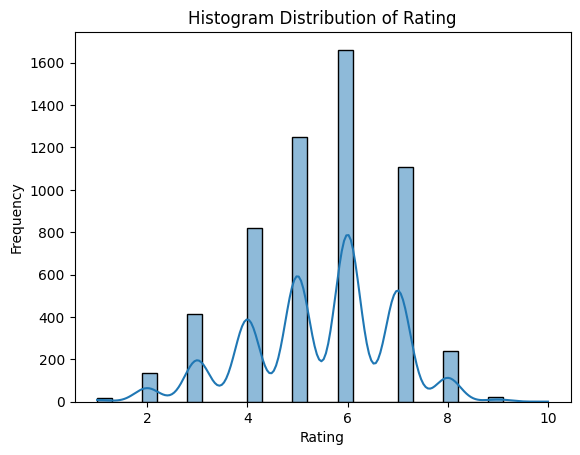

In [31]:
sns.histplot(data=df_pre,x='num__Rating',kde=True,bins=30)
plt.title(f'Histogram Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

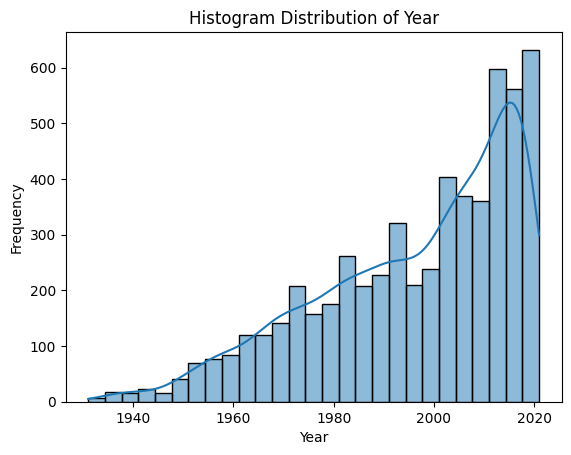

In [32]:
sns.histplot(df_pre,x='num__Year',kde=True)
plt.title('Histogram Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis
Lets understand the relation between our features

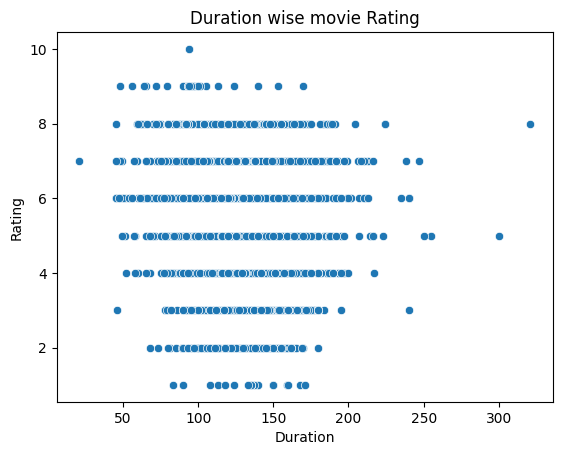

In [33]:
sns.scatterplot(data=df_pre,x='num__Duration',y='num__Rating')
plt.title('Duration wise movie Rating')
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.show()

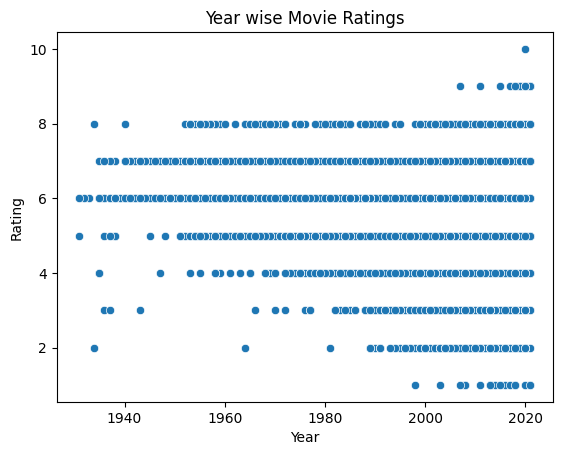

In [34]:
sns.scatterplot(data=df_pre,x='num__Year',y='num__Rating')
plt.title('Year wise Movie Ratings')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

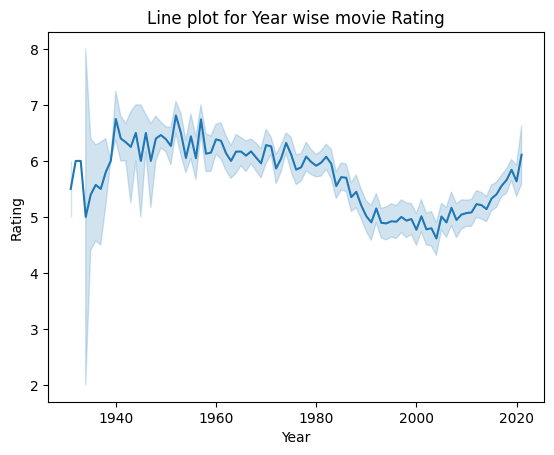

In [35]:
sns.lineplot(df_pre,x='num__Year',y='num__Rating')
plt.title('Line plot for Year wise movie Rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

### Years with best rating are 1940-1980

Correlation

In [36]:
df_pre[con1].corr()

,num__Year,num__Duration,num__Rating,num__Votes
num__Year,1.000000,-0.327567,-0.202208,0.129749
num__Duration,-0.327567,1.000000,0.005426,0.097621
num__Rating,-0.202208,0.005426,1.000000,0.144959
num__Votes,0.129749,0.097621,0.144959,1.000000


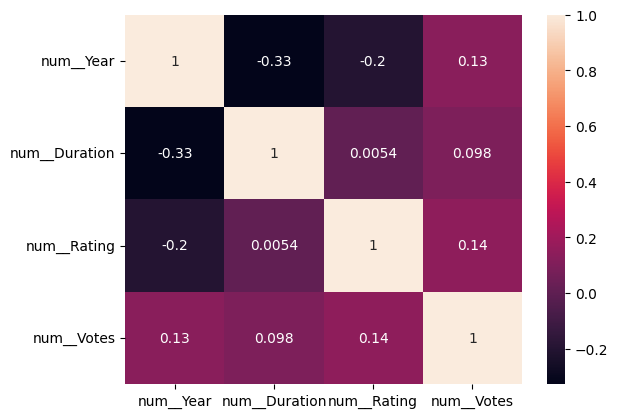

In [37]:
sns.heatmap(df_pre[con1].corr(),annot=True)
plt.show()

# Top 10 Genre's


In [38]:
genres = df_pre['cat__Genre'].str.split(',',expand=True)
genres.head()

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller


In [39]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in (genre_counts.items())}

In [40]:
genereCounts_list= sorted(genereCounts.items(),key=lambda x:x[1],reverse=True)
genereCounts_sorted_top10 = dict(genereCounts_list[:11])
# am considering 11 as Drama Genre is repeated twice
genereCounts_sorted_top10

{' Drama': 1954,
 'Drama': 1842,
 'Action': 1652,
 ' Romance': 1221,
 'Comedy': 989,
 ' Crime': 604,
 ' Thriller': 590,
 ' Family': 364,
 ' Comedy': 355,
 ' Musical': 322,
 'Crime': 271}

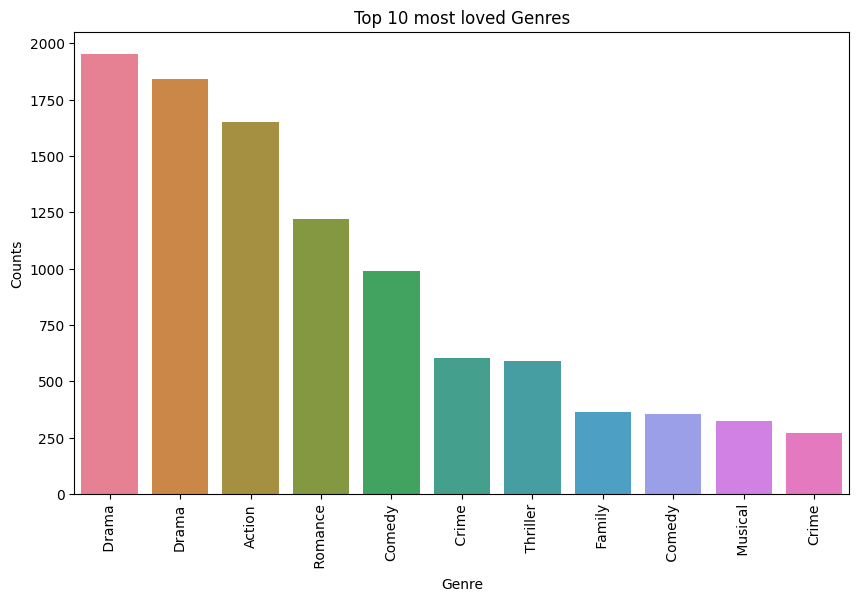

In [110]:
labels1 = genereCounts_sorted_top10.keys()
count1 = genereCounts_sorted_top10.values()
plt.figure(figsize=(10,6))
sns.barplot(x=labels1,y=count1,hue=labels1)
plt.xticks(rotation=90)
plt.title('Top 10 most loved Genres')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

## Top 10 Rated Directors

Text(0, 0.5, 'Ratings')

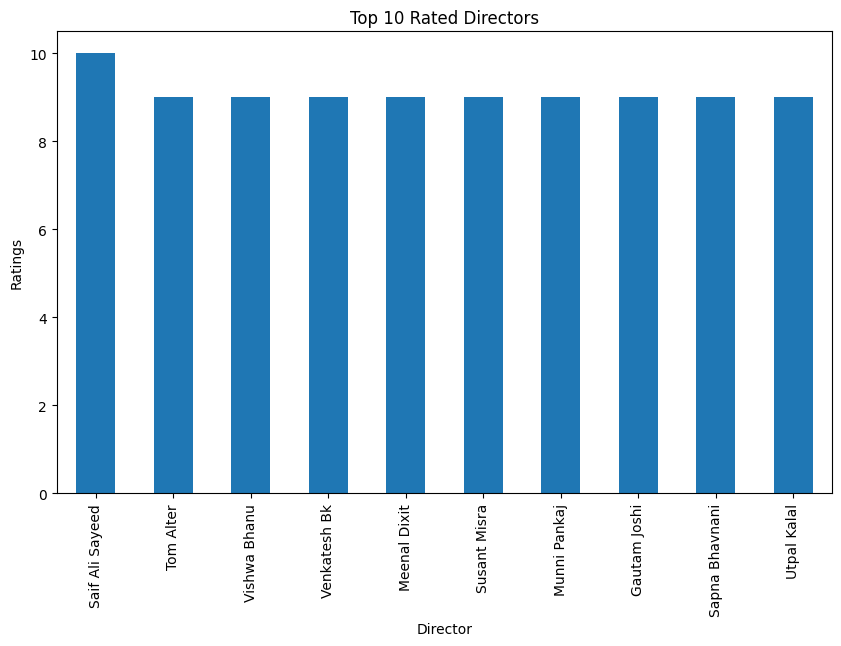

In [109]:
a=df_pre.groupby('cat__Director').mean(numeric_only=True)['num__Rating']
direct = a.sort_values(ascending=False)
plt.figure(figsize=(10,6))
direct.head(10).plot(kind='bar')
plt.title('Top 10 Rated Directors')
plt.xlabel('Director')
plt.ylabel('Ratings')

## Top 10 Directors who directed most of the movies

Text(0, 0.5, 'Number of movies directed')

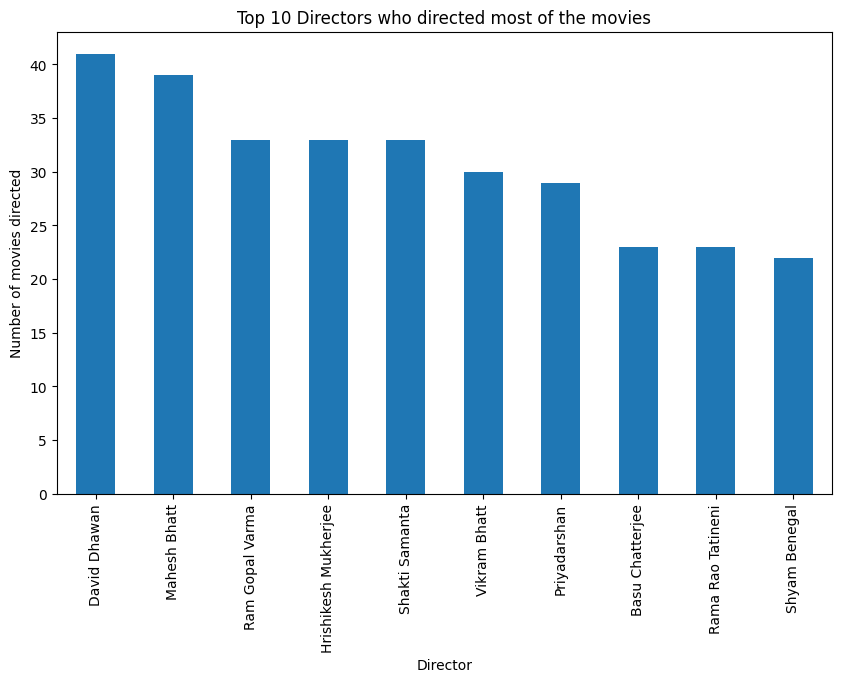

In [108]:
plt.figure(figsize=(10,6))
df_pre['cat__Director'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Directors who directed most of the movies')
plt.xlabel('Director')
plt.ylabel('Number of movies directed')

## Year wise Ratings

In [44]:
a1 = pd.DataFrame(df_pre.groupby(['num__Year','num__Rating']).count()).reset_index()

Year_df = a1[['num__Year','num__Rating']]
Year_df.head()

,num__Year,num__Rating
0,1931,5
1,1931,6
2,1932,6
3,1933,6
4,1934,2


In [45]:
f1 = (Year_df['num__Year'] < 1950) 
f2 = (Year_df['num__Year'] > 1950) & (Year_df['num__Year'] <1970)
f3 = (Year_df['num__Year'] >1970) & (Year_df['num__Year'] <2000)
f4 = (Year_df['num__Year'] >2000) & (Year_df['num__Year'] <2021)

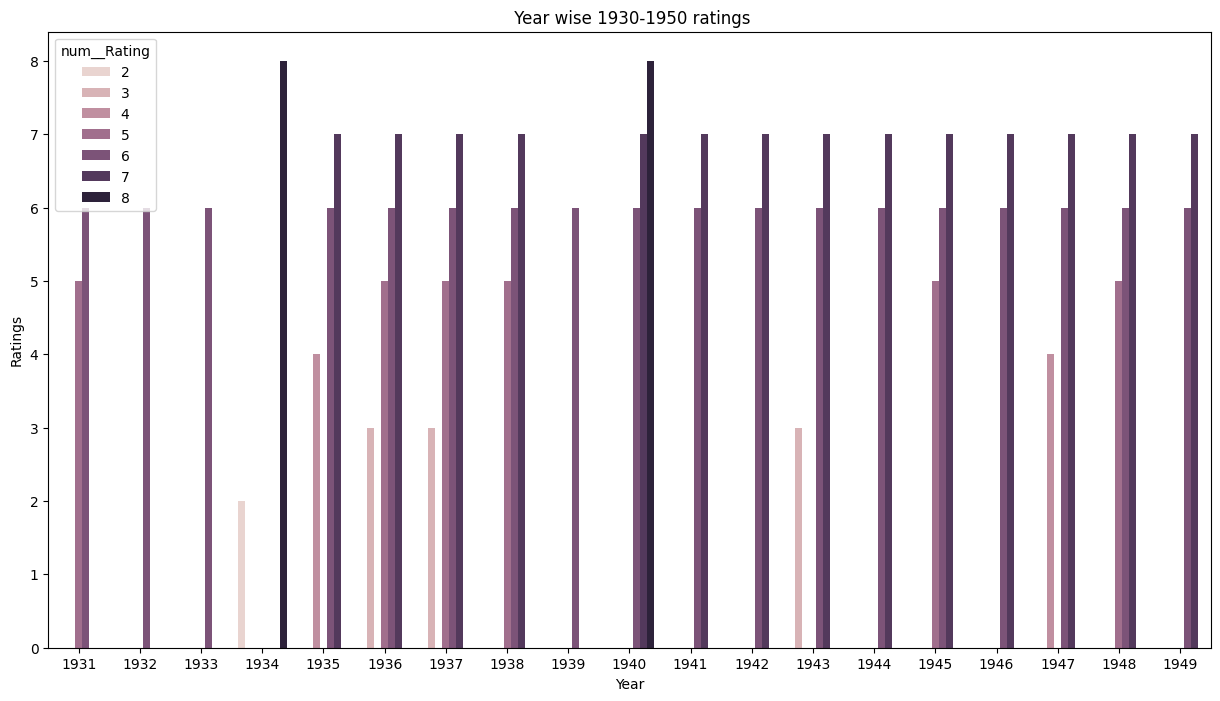

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(Year_df[f1],x='num__Year',y='num__Rating',hue='num__Rating')
plt.title(" Year wise 1930-1950 ratings")
plt.xlabel('Year')
plt.ylabel('Ratings')
plt.show()

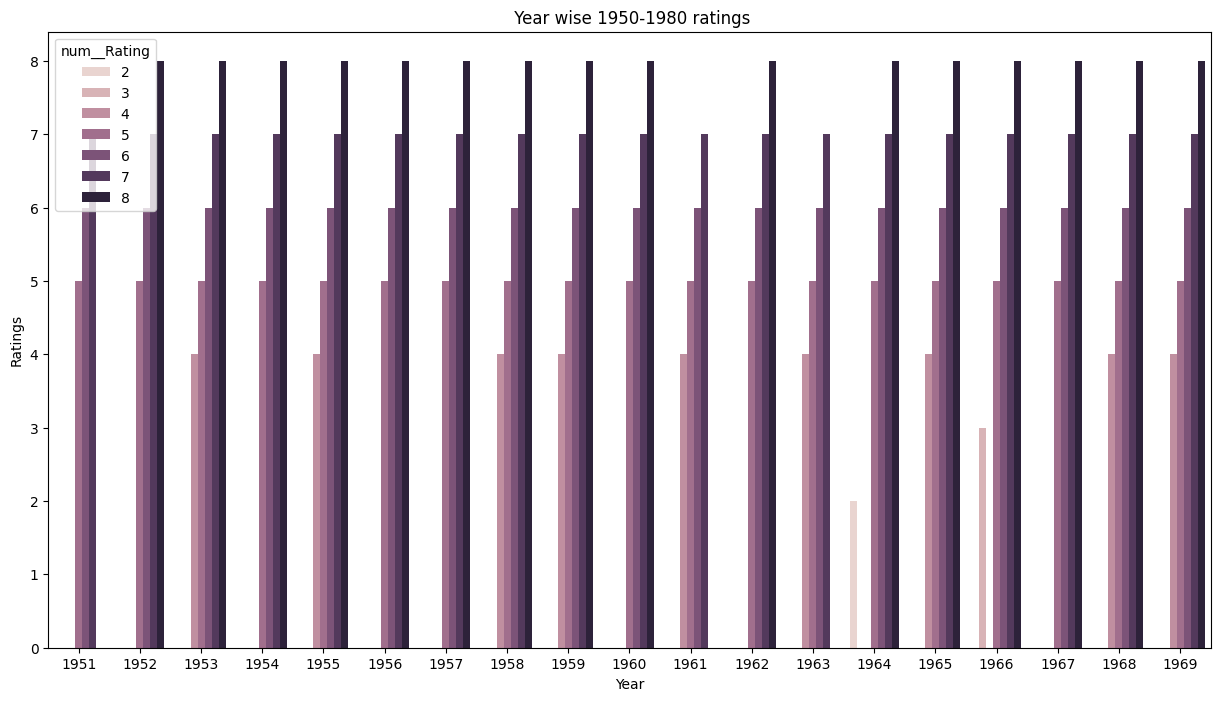

In [47]:
plt.figure(figsize=(15,8))
sns.barplot(Year_df[f2],x='num__Year',y='num__Rating',hue='num__Rating')
plt.title(" Year wise 1950-1980 ratings")
plt.xlabel('Year')
plt.ylabel('Ratings')
plt.show()

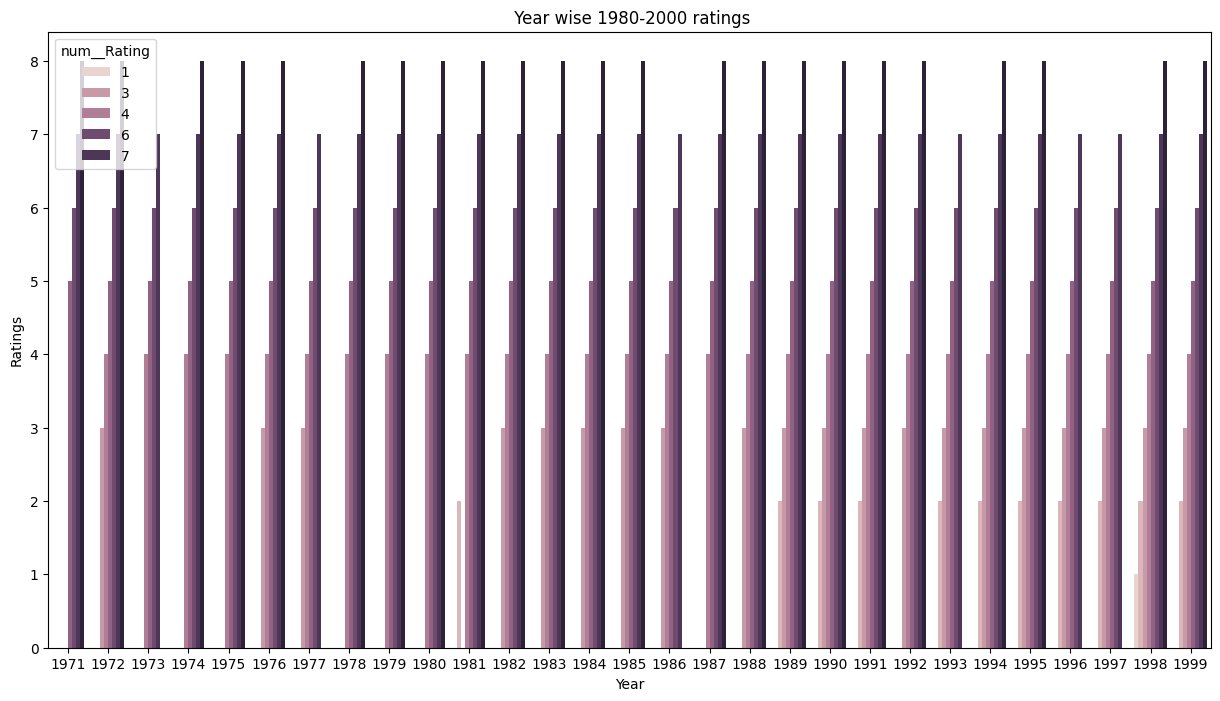

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(Year_df[f3],x='num__Year',y='num__Rating',hue='num__Rating')
plt.title(" Year wise 1980-2000 ratings")
plt.xlabel('Year')
plt.ylabel('Ratings')
plt.show()

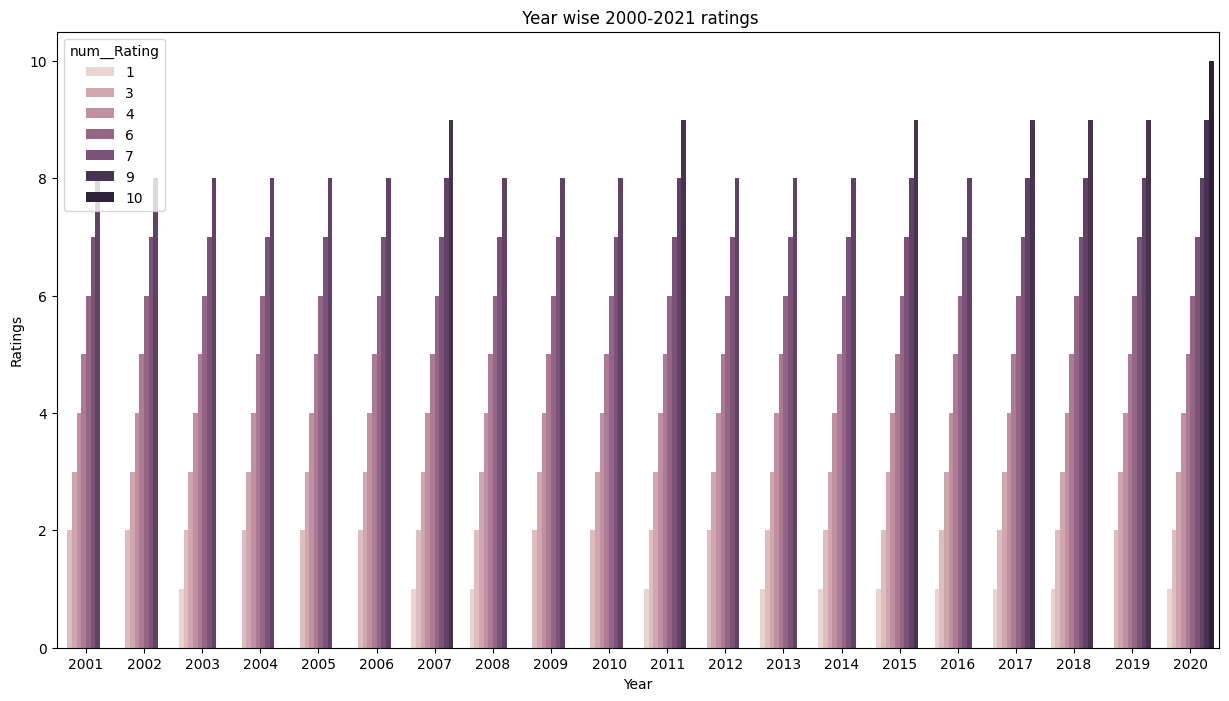

In [49]:
plt.figure(figsize=(15,8))
sns.barplot(Year_df[f4],x='num__Year',y='num__Rating',hue='num__Rating')
plt.title(" Year wise 2000-2021 ratings")
plt.xlabel('Year')
plt.ylabel('Ratings')
plt.show()

## Top 10 Movies

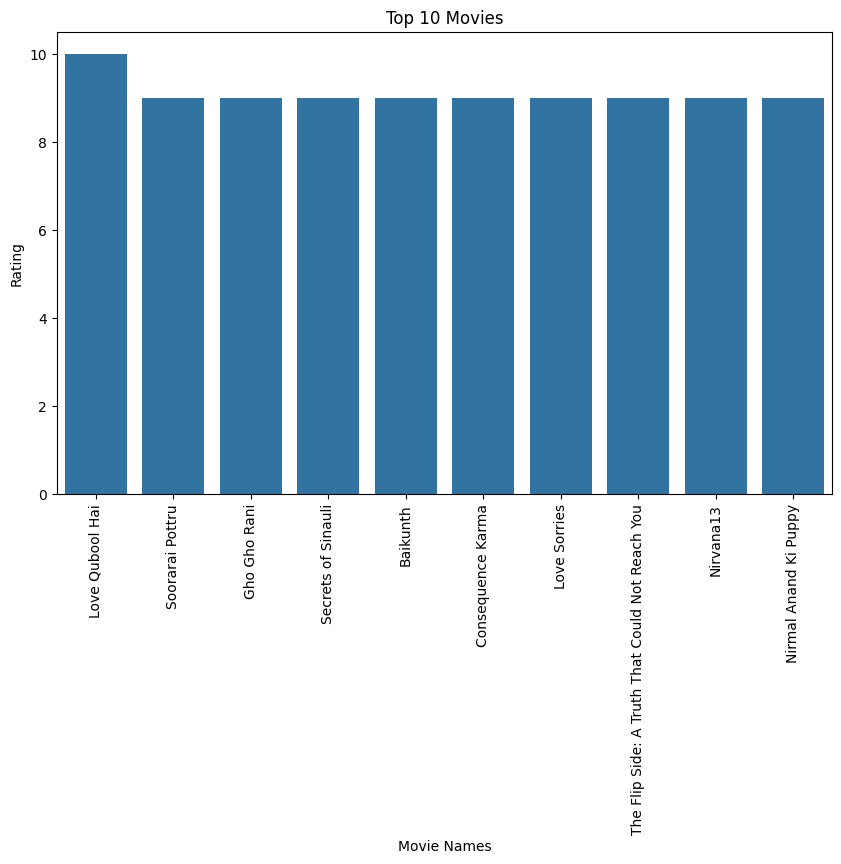

In [75]:
n = df_pre[['num__Rating','cat__Name']]
plt.figure(figsize=(10,6))
top10_movies = n.sort_values('num__Rating',ascending=False).head(10)
sns.barplot(top10_movies,x='cat__Name',y='num__Rating')
plt.xticks(rotation=90)
plt.title('Top 10 Movies')
plt.xlabel('Movie Names')
plt.ylabel('Rating')
plt.show()

## Popular movies released each year and the votes it received

In [104]:
yearwise_movies = df_pre[['cat__Name','num__Rating','num__Year','num__Votes']]
yearwise_movies.rename(columns={'cat__Name':'Movie Name','num__Rating':'Rating','num__Votes':'Votes'},inplace=True)
yearwise_movies = yearwise_movies.sort_values('Rating',ascending=False)
f = yearwise_movies['Rating'] >= 9
yearwise_movies[f]

,Movie Name,Rating,num__Year,Votes
8339,Love Qubool Hai,10,2020,5
13384,Soorarai Pottru,9,2020,83029
5077,Gho Gho Rani,9,2019,47
12673,Secrets of Sinauli,9,2021,1373
1729,Baikunth,9,2021,29
3224,Consequence Karma,9,2021,223
8344,Love Sorries,9,2021,79
14071,The Flip Side: A Truth That Could Not Reach You,9,2015,97
10217,Nirvana13,9,2011,99
10210,Nirmal Anand Ki Puppy,9,2019,7


## Popular actors

In [106]:
top_actors = df_pre[['cat__Actor 1','num__Rating']]
top_actors.rename(columns={'cat__Actor 1':'Actor','num__Rating':'Rating'},inplace=True)
top_actors = top_actors.sort_values('Rating',ascending=False)

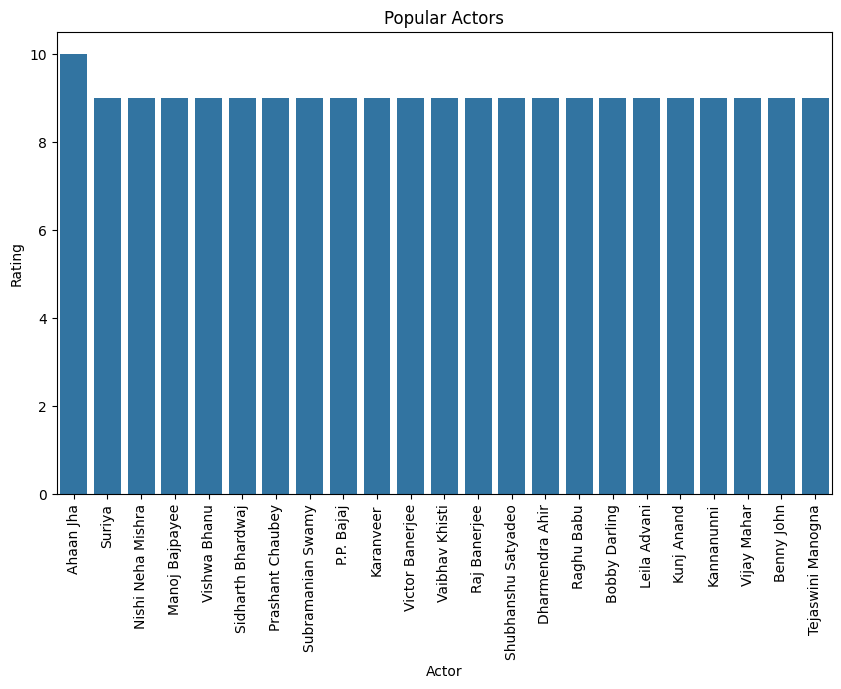

In [107]:
plt.figure(figsize=(10,6))
sns.barplot(top_actors[f],x='Actor',y='Rating')
plt.xticks(rotation=90)
plt.title('Popular Actors')
plt.xlabel('Actor')
plt.ylabel('Rating')
plt.show()

## Observations:

    1. Ahaan Jha is the top actor
    2. Love Qubool hai' movie received top rating
    3. 2020 Year has got the top rating
    4. Saif Ali Sayeed is the top rated director
    5. David Dhawan directed most of the movies 
    6. Drama is the most loved Genre
    7. Action, Romance are among the top loved Genre's
    8. Soorarai Pottru is the highest voted movie
    9. Years 1940-1980 showed consistency to acheive top ratings